In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


In [27]:
# Load Power264 timeseries and calculate FC

import pickle
import numpy as np

rest = pickle.load(open('/home/anton/Documents/Tulane/Research/PNC_canonical/PNC_SPM_rest_good_filt.pkl', 'rb'))
nback = pickle.load(open('/home/anton/Documents/Tulane/Research/PNC_canonical/PNC_SPM_nback_good_filt.pkl', 'rb'))
emoid = pickle.load(open('/home/anton/Documents/Tulane/Research/PNC_canonical/PNC_SPM_emoid_good_filt.pkl', 'rb'))

a,b = np.triu_indices(264, 1)

restfc = dict()
nbackfc = dict()
emoidfc = dict()

subs = set()

for sub,ts in rest.items():
    restfc[sub] = remap(np.corrcoef(ts))[a,b]
    if np.sum(np.isnan(restfc[sub])) > 0:
        print(sub)
    subs.add(sub)

for sub,ts in nback.items():
    nbackfc[sub] = remap(np.corrcoef(ts))[a,b]
    if np.sum(np.isnan(nbackfc[sub])) > 0:
        print(sub)
    subs.add(sub)

for sub,ts in emoid.items():
    emoidfc[sub] = remap(np.corrcoef(ts))[a,b]
    if np.sum(np.isnan(emoidfc[sub])) > 0:
        print(sub)
    subs.add(sub)

subs = list(subs)

print('Done')

Done


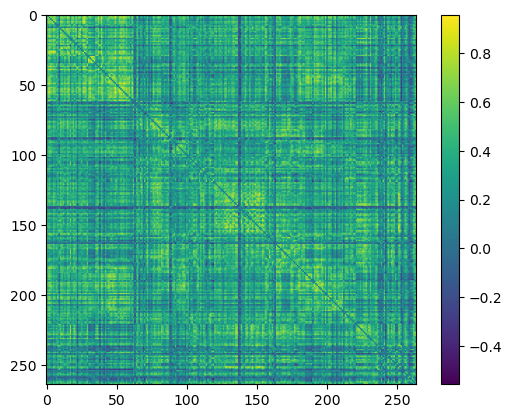

In [14]:
import matplotlib.pyplot as plt

plt.imshow(vec2mat(restfc[subs[2]]))
plt.colorbar()

In [16]:
import pandas as pd

pheno = pd.read_csv('/home/anton/Documents/Tulane/Research/PNC_canonical/phenotypes.txt', sep='\t', comment='#')

pheno

/tmp/ipykernel_39020/3009001478.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  pheno = pd.read_csv('/home/anton/Documents/Tulane/Research/PNC_canonical/phenotypes.txt', sep='\t', comment='#')


,dbGaP_Subject_ID,SUBJID,INT_NUM,INT_TYPE,Race,Sex,Med_birth_year,Med_Rating,ADD011,ADD012,...,SUB_OTC,SUB_PSY,SUB_STER,SUB_STIM,SUB_TOB,SUB_TRAN,SUB_TOT,Education,Mother_Education,Father_Education
0,791086,600001103037,1,MP,AA,M,1999.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,12.0,NaN
1,791086,600001103037,2,MI,AA,M,1999.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,791087,600001676724,1,AP,AA,F,1990.0,2,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN
3,791088,600003245643,1,YPI,AA,M,2003.0,2,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,15.0,18.0
4,791090,600004963801,1,MP,EA,F,1998.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,20.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14636,800198,609993878116,2,MI,EA,M,1998.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14637,800199,609998081561,1,MP,"EA,HI + OT",M,1998.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.0,NaN
14638,800199,609998081561,2,MI,"EA,HI + OT",M,1998.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14639,800200,609999144528,1,MP,EA,F,1999.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,20.0,18.0


In [32]:
from math import isnan

aged = dict()
sexd = dict()
raced = dict()

for sub in subs:
    row = pheno[pheno['SUBJID'] == int(sub)].iloc[0]
    age = row['age_at_cnb']
    sex = row['Sex']
    race = row['Race']
    if isnan(age) or isinstance(sex, float) or isinstance(race, float):
        print(sub)
        continue
    if race != 'AA' and race != 'EA':
        continue
    aged[sub] = age
    sexd[sub] = int(sex == 'M')
    raced[sub] = int(race == 'AA')
    print(aged[sub], sexd[sub], raced[sub])

print(len(raced))
print('Done')

12.0 1 1
18.0 0 1
17.0 0 1
14.0 0 1
8.0 0 0
10.0 1 0
18.0 1 1
15.0 0 0
18.0 1 0
18.0 0 0
13.0 0 1
18.0 0 1
18.0 1 0
18.0 1 0
16.0 1 0
14.0 1 0
11.0 1 0
16.0 0 0
17.0 0 0
19.0 1 0
21.0 1 0
16.0 1 0
9.0 1 0
14.0 0 1
12.0 0 0
9.0 1 0
19.0 0 0
15.0 1 0
18.0 0 1
9.0 1 1
8.0 0 1
12.0 1 0
12.0 0 1
19.0 0 0
16.0 0 0
14.0 0 1
12.0 0 1
17.0 1 0
16.0 0 1
14.0 0 0
13.0 1 0
12.0 0 1
16.0 0 1
14.0 0 1
14.0 1 0
18.0 0 0
10.0 0 1
19.0 1 0
18.0 1 1
21.0 0 0
11.0 0 1
9.0 1 1
9.0 0 0
17.0 1 0
19.0 0 0
18.0 0 1
18.0 1 1
20.0 1 0
16.0 1 1
19.0 0 0
15.0 1 0
18.0 1 0
17.0 1 1
14.0 0 0
11.0 0 0
18.0 0 0
18.0 0 1
16.0 0 0
9.0 0 1
14.0 0 1
11.0 0 1
21.0 1 1
14.0 1 0
13.0 1 0
15.0 1 0
9.0 1 0
10.0 0 1
18.0 0 0
10.0 0 1
10.0 1 0
15.0 0 1
18.0 0 0
11.0 1 0
9.0 0 0
14.0 0 1
16.0 1 1
12.0 1 0
12.0 1 1
14.0 0 1
14.0 1 1
10.0 1 1
17.0 1 0
10.0 1 0
14.0 0 1
15.0 1 0
15.0 0 1
10.0 0 1
17.0 0 0
15.0 0 0
13.0 0 1
18.0 0 0
13.0 0 1
13.0 1 0
18.0 0 0
12.0 1 1
18.0 0 0
14.0 1 1
12.0 0 1
16.0 1 0
17.0 0 1
10.0 1 0
13.0 0 0
11

In [35]:
# Create dictionary containing scans and age, sex, race info

dct = dict()

srest = set(restfc.keys())
snback = set(nbackfc.keys())
semoid = set(emoidfc.keys())
srace = set(raced.keys())'/home/anton/Documents/Tulane/Research/PNC_canonical/

goodsubs = srest.intersection(snback).intersection(semoid).intersection(srace)
print(len(goodsubs))

dct['rest'] = dict()
dct['nback'] = dict()
dct['emoid'] = dict()
dct['age'] = dict()
dct['sex'] = dict()
dct['race'] = dict()

for sub in goodsubs:
    dct['rest'][sub] = restfc[sub]
    dct['nback'][sub] = nbackfc[sub]
    dct['emoid'][sub] = emoidfc[sub]
    dct['age'][sub] = aged[sub]
    dct['sex'][sub] = sexd[sub]
    dct['race'][sub] = raced[sub]

print(len(dct))

pickle.dump(dct, open('/home/anton/Documents/Tulane/Research/DemoVAE/PNC_dict.pkl', 'wb'))

print('Done')

1193
6
Done
